In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

In [31]:
data = pd.read_csv('/Users/Yu/Documents/GitHub/Midterm_Project/data/cleaned_data.csv')


### Build a OLS model to analyze the linear relationship between Happiness Score and the six factors.

In [30]:
# Build a OLS model to analyze
# Define the target variable (dependent variable) and feature variables (independent variables)
target = 'Happiness Score'
features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]

# Add a constant term to the features (for the intercept)
X = sm.add_constant(data[features])

# Define the target variable
y = data[target]

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the summary of the OLS regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     668.7
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:45:05   Log-Likelihood:                -1150.3
No. Observations:                1365   AIC:                             2315.
Df Residuals:                    1358   BIC:                             2351.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [50]:
# Make predictions using the fitted model
y_pred = results.predict(X)

# Calculate R-squared (R^2) score
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Print R-squared and MSE
print("R-squared (R^2):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R^2): 0.7471256597164395
Mean Squared Error (MSE): 0.3158721423061293


The MSE value of 0.315 is relatively low, indicating that the model's predictions are, on average, close to the actual happiness scores. However, the interpretation of MSE can be subjective based on the scale of your target variable.

The R-squared value of 0.747 means that about 74.7% of the variability in happiness scores is captured by the features in your model. This suggests a moderately good fit, indicating that the model is capturing a significant portion of the variability in happiness scores.


#### Interpret the model coefficients

It is interesting to see, based on the linear regression model, the predictors impact the Happiness Score of a Country. Health and freedom contribute more to the Score, and Trust has a lower impact. At the same time, GDP's value is a bit lower than other, we may need to check it in details. p-value shows 0 is not really 0, it far close to zero and then shows as 0. I tested each single year's data, and the p-value in those tests are not 0.

Explanation: 
Economy (GDP per Capita): 0.8082
For every one-unit increase in the GDP per Capita, the happiness score is expected to increase by approximately 0.8082. This suggests that higher GDP per capita tends to be associated with higher happiness scores.

Family: 0.7486
For every one-unit increase in the Family variable, the happiness score is expected to increase by approximately 0.7486. A strong sense of social support or family relationships appears to have a positive impact on happiness scores.

Health (Life Expectancy): 1.3283
Interestingly, for every one-unit increase in Life Expectancy, the happiness score is expected to decrease by approximately 1.3283. This might seem counterintuitive, and further investigation might be needed. It's possible that other factors are affecting this relationship.

Freedom: 1.5735
For every one-unit increase in Freedom, the happiness score is expected to increase by approximately 1.633. Higher levels of perceived freedom are associated with higher happiness scores.

Trust (Government Corruption): 0.8423
For every one-unit increase in the Trust variable (lower corruption), the happiness score is expected to decrease by approximately 0.8423. This suggests that countries with higher levels of trust in their government might have slightly lower happiness scores.

Generosity: 0.7163
For every one-unit increase in Generosity, the happiness score is expected to increase by approximately 0.7163. Higher levels of generosity might contribute to higher happiness scores.

/var/folders/xp/ykwfcbhn1f76h1445qt7fyxm0000gn/T/ipykernel_86356/3528305889.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="r", label="Actual value")
/var/folders/xp/ykwfcbhn1f76h1445qt7fyxm0000gn/T/ipykernel_86356/3528305889.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

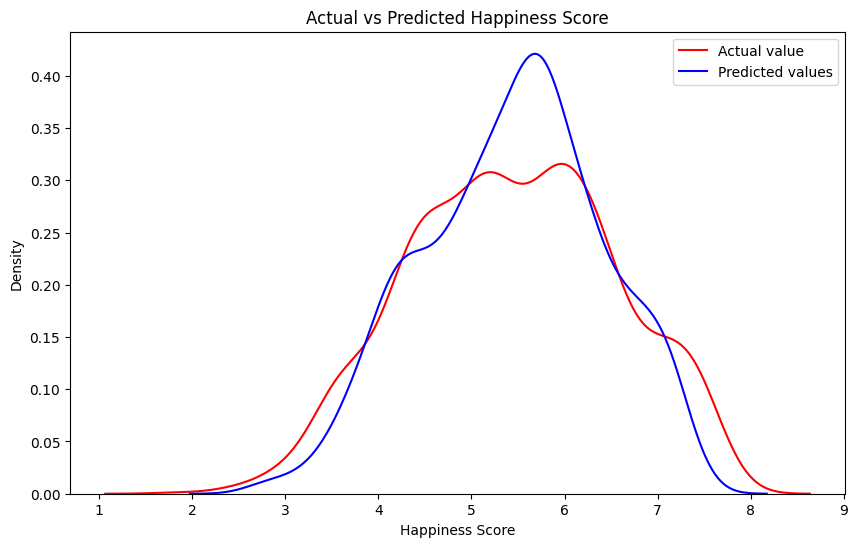

In [52]:
# Visualize the prediction by using a distribution plot to compare the distribution of our data and the distribution od our predicted data
# Plot a distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure and axis
plt.figure(figsize=(10, 6))

# Plotting the distribution plot
sns.distplot(y, hist=False, color="r", label="Actual value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted values")

plt.title("Actual vs Predicted Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Density")
plt.legend()

plt.show()



As we can see, this model is resonably good to predict the most and the least happier countries scores, while not good to predict medium happy countries.

In [55]:
# Build a classification model to predict whether a country's happniess rank will be increase, decrease or remain the same in the next year
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]
target = "Happiness Rank"

X = data[features]
y = data['Happiness Rank'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.03663003663003663


In [17]:
# Use Canada as an example to test the model
canada_data = data.loc[data['Country'] == 'Canada']
canada_data_2023 = canada_data.loc[canada_data['Year'] == 2023]
canada_data_2023

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
1241,2023,Canada,13,6.961,1.881,1.484,0.541,0.656,0.364,0.218


In [49]:
canada_features = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]

# Use the above model for prediction
predicted_class = clf.predict(canada_data_2023[canada_features])

# Interpret the prediction
if predicted_class == 'increase':
    print("The model predicts Canada's rank will increase.")
elif predicted_class == 'decrease':
    print("The model predicts Canada's rank will decrease.")
else:
    print("The model predicts Canada's rank will remain the same.")


The model predicts Canada's rank will remain the same.


### Linear relationship visualization

/opt/anaconda3/envs/the_one/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


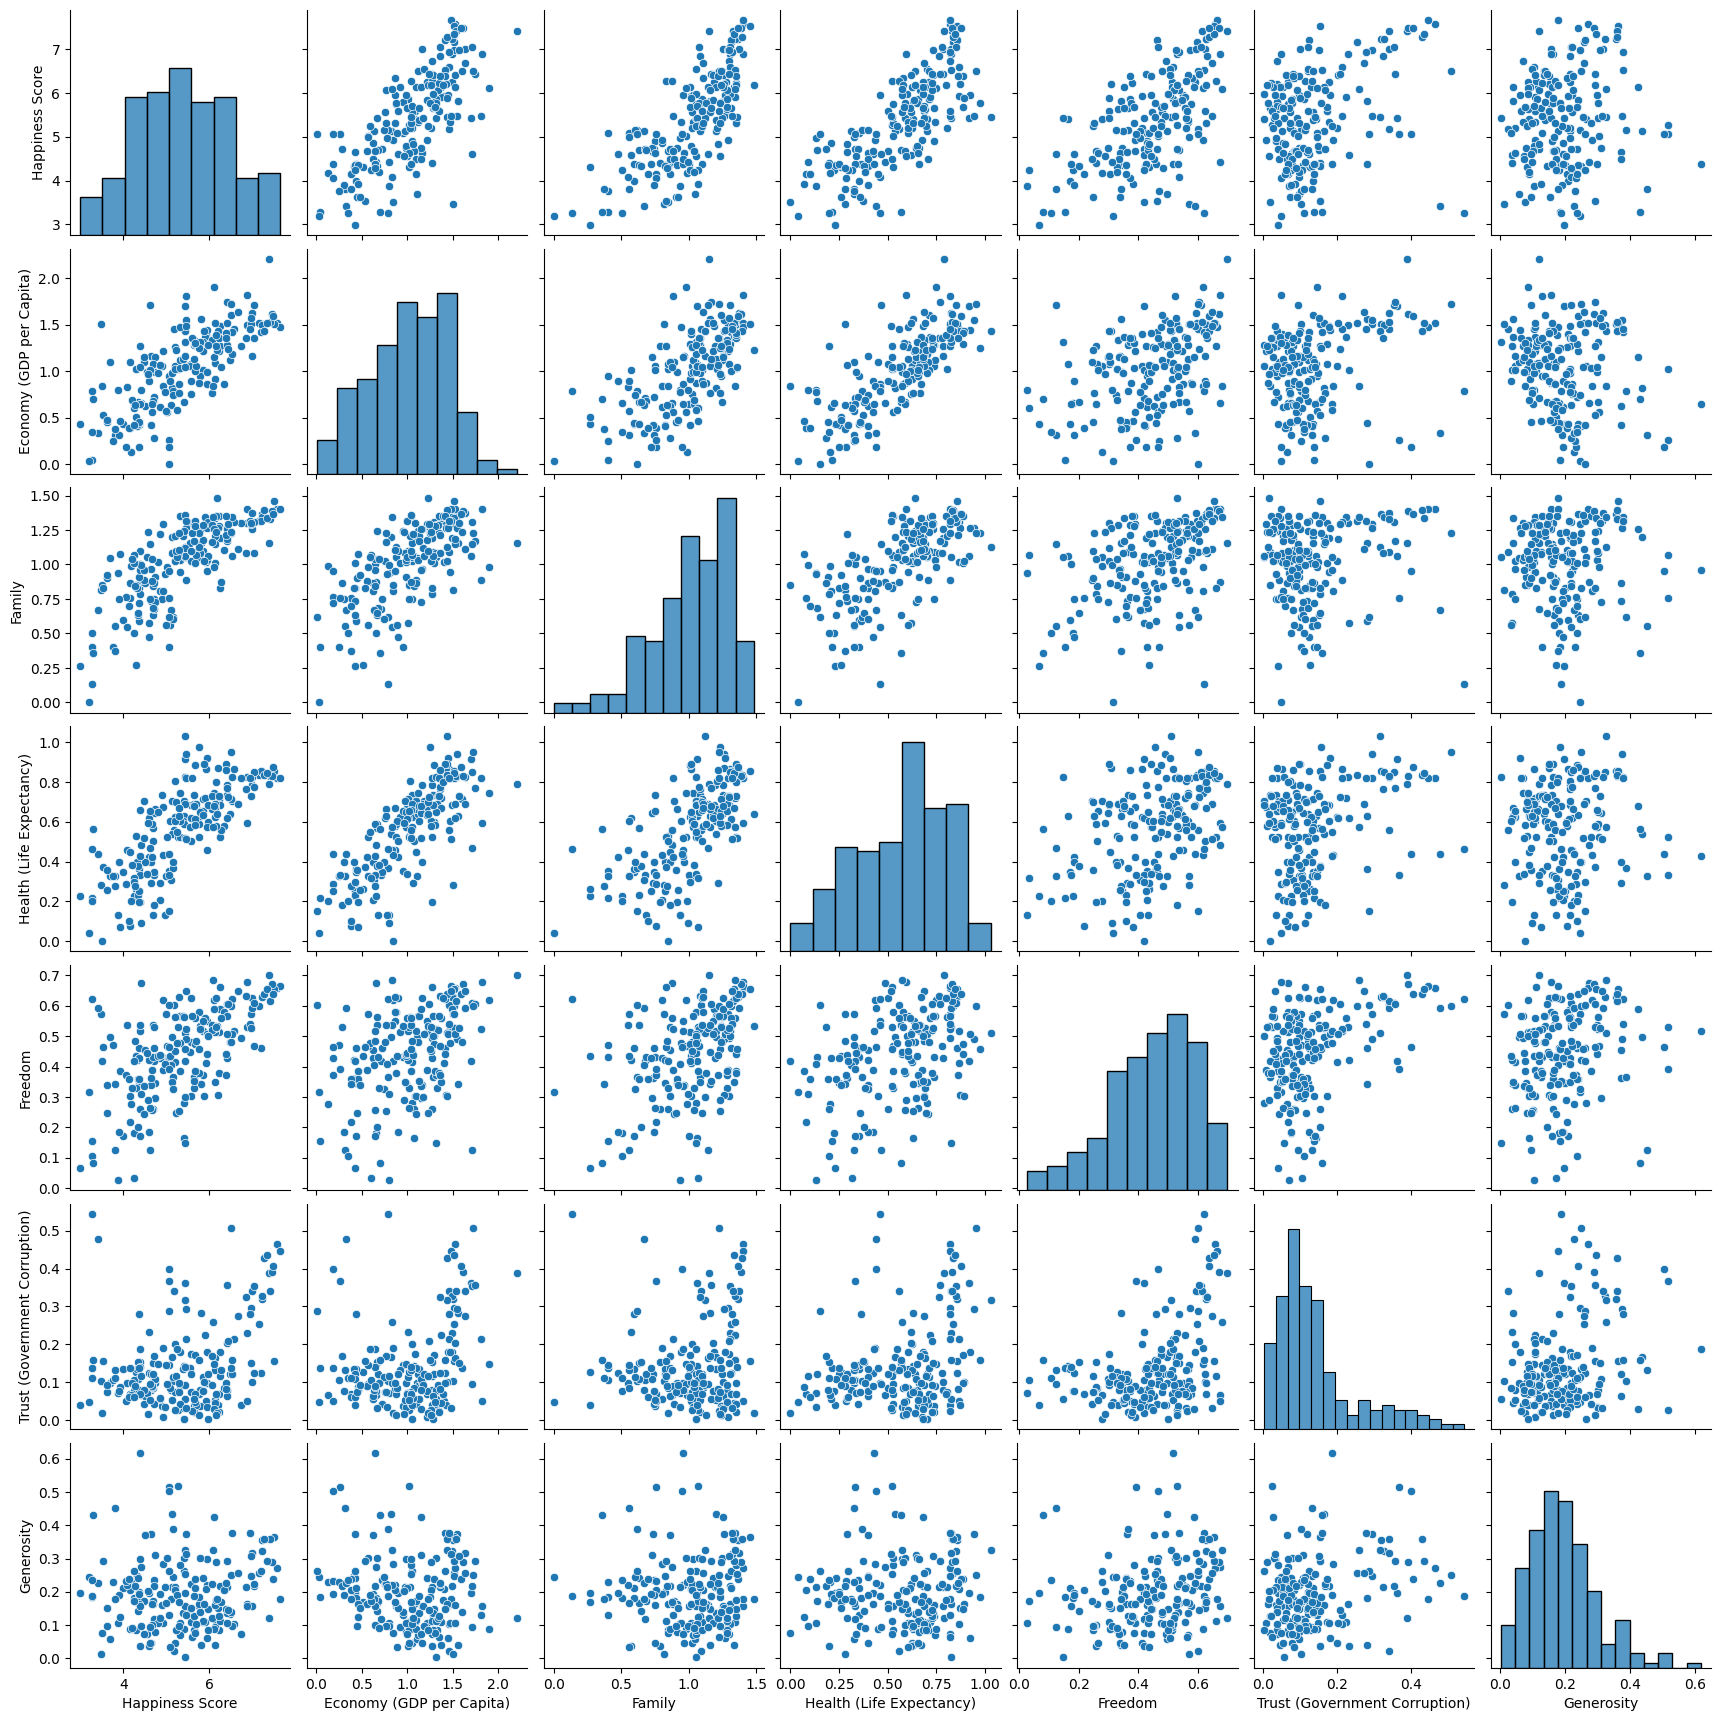

In [22]:
# Plot scatter matrix
data.loc[:,~data.columns.isin(["Happiness Rank","Year"])].groupby('Country').mean()
sns.pairplot(data.loc[:,~data.columns.isin(["Happiness Rank","Year"])].groupby('Country').mean())

By looking at the first row of the plot, we can see most of the predictors have a linear positive relation with the Happiness Score.
For Government Corrution, maybe an exponential function could decribe the relation. For Generosity, it is not obvious to see the relationship.

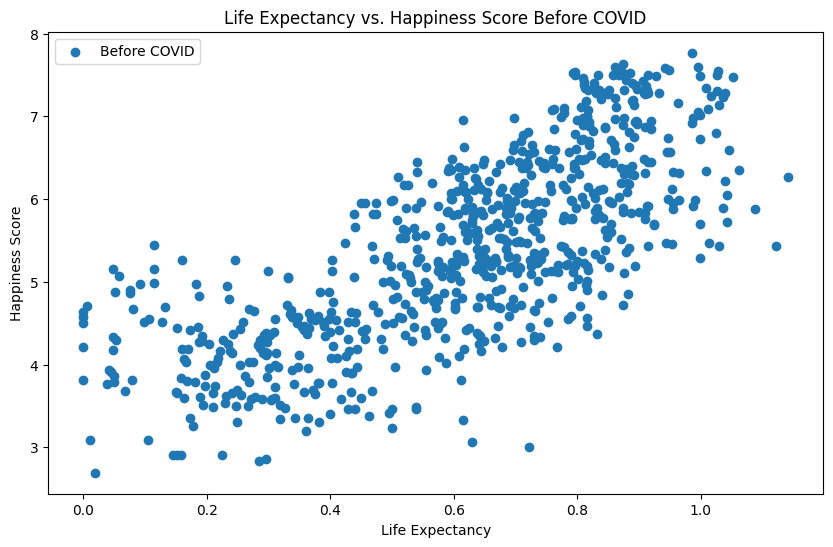

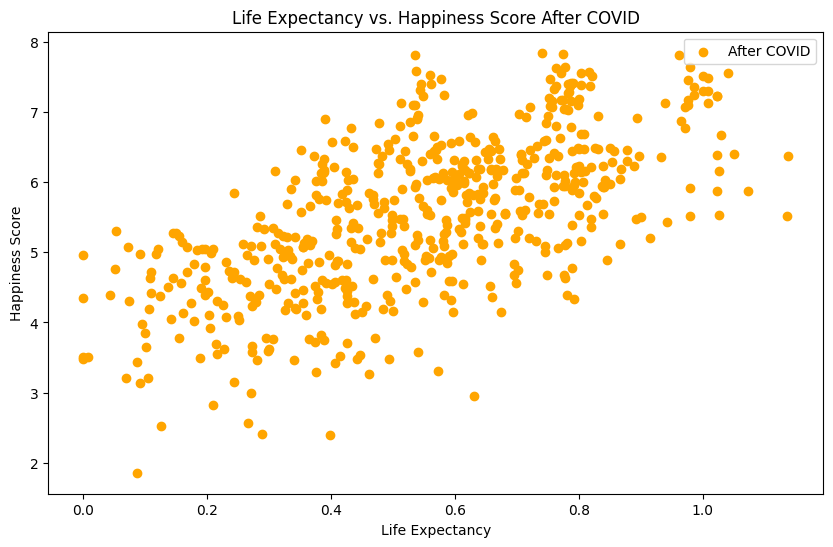

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for years before and after COVID-19
data_before_covid = data[data['Year'] < 2020]
data_after_covid = data[data['Year'] >= 2020]

# Scatter plot: Life Expectancy vs. Happiness Score (Before COVID)
plt.figure(figsize=(10, 6))
plt.scatter(data_before_covid['Health (Life Expectancy)'], data_before_covid['Happiness Score'], label='Before COVID')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Life Expectancy vs. Happiness Score Before COVID')
plt.legend()
plt.show()

# Scatter plot: Life Expectancy vs. Happiness Score (After COVID)
plt.figure(figsize=(10, 6))
plt.scatter(data_after_covid['Health (Life Expectancy)'], data_after_covid['Happiness Score'], label='After COVID', color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Life Expectancy vs. Happiness Score After COVID')
plt.legend()
plt.show()


### Country of Canada

In [94]:
canada_data = data[data['Country'] == 'Canada']
canada_data
canada_data.to_csv('canada_data.csv', sep=',', index=False)

#### Trend Analysis

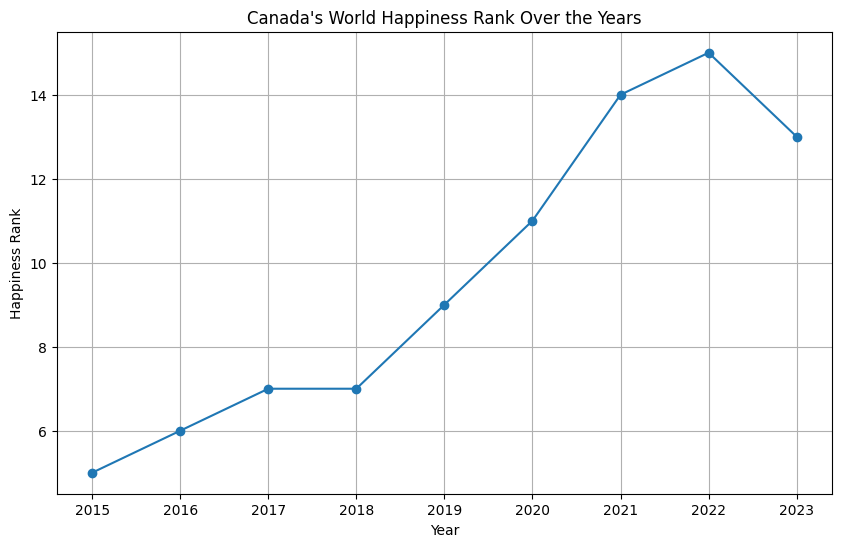

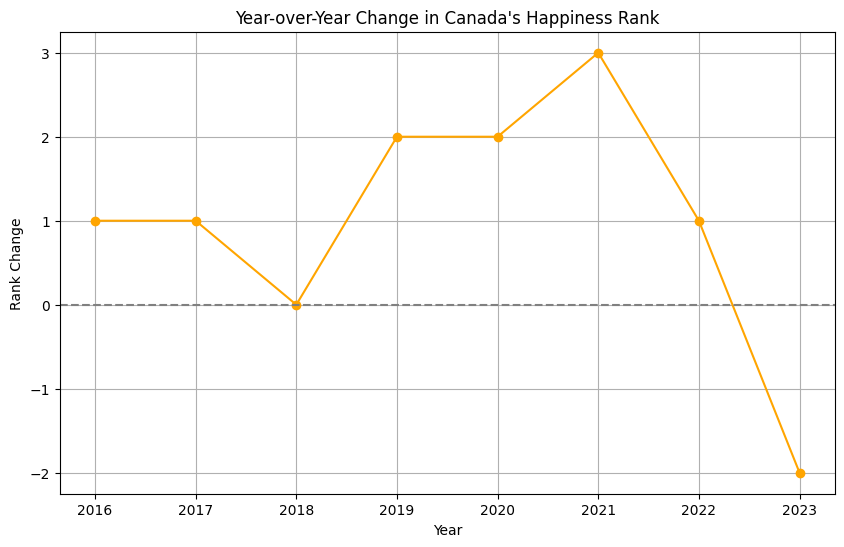

Average Annual Change in Happiness Rank: 1.0


In [81]:
# Sort the data by year
df = canada_data.sort_values(by='Year')

# Plot the trend of Canada's World Happiness Rank over the years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Happiness Rank'], marker='o')
plt.title("Canada's World Happiness Rank Over the Years")
plt.xlabel("Year")
plt.ylabel("Happiness Rank")
plt.grid(True)
plt.show()

# Calculate the year-over-year change in happiness rank
df['Rank Change'] = df['Happiness Rank'].diff()

# Plot the year-over-year change in happiness rank
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Rank Change'], marker='o', color='orange')
plt.title("Year-over-Year Change in Canada's Happiness Rank")
plt.xlabel("Year")
plt.ylabel("Rank Change")
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

average_change = np.mean(df['Rank Change'])

print("Average Annual Change in Happiness Rank:", average_change)

#### Correlation heatmap for Canada

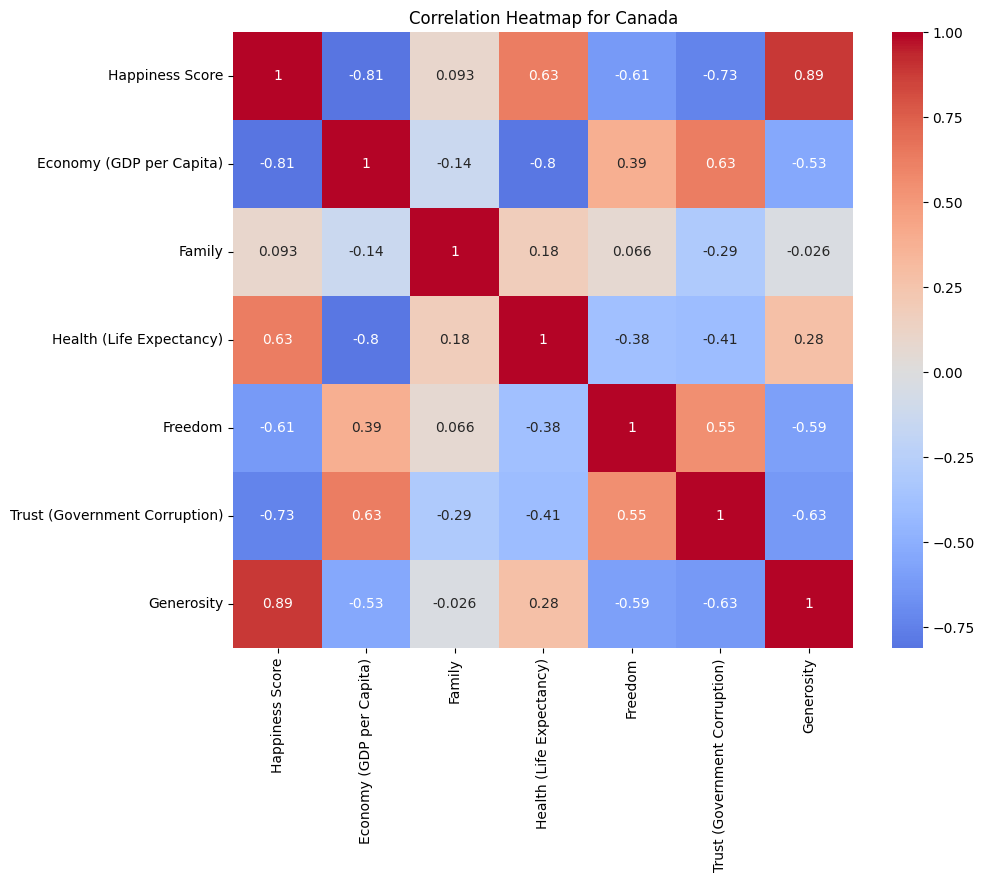

In [95]:

# Select columns for correlation matrix
selected_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Compute correlation matrix
correlation_matrix = canada_data[['Happiness Score'] + selected_columns].corr()

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Canada')
plt.show()

Interest result: it shows Economy has negtive correlation and Generosity has the most positive correlation with Canada's Happiness Score. Health has also a strong correlation while Family seems has no linear relationship with the Happiness Score.

#### Future Predictions

/opt/anaconda3/envs/the_one/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/the_one/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/the_one/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


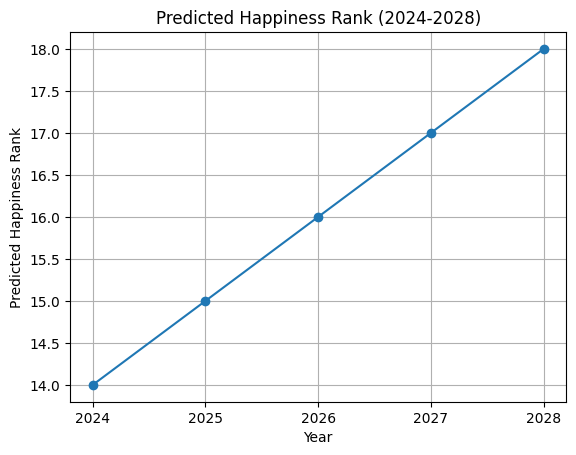

In [91]:
# Use the Exponential Smoothing model for predicting Canada's happiness rank
# Select relevant features and target
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
target = 'Happiness Rank'

# Split data into training and test sets
train_data = canada_data[canada_data['Year'] <= 2023] 
test_years = [2024, 2025, 2026, 2027, 2028]

X_train = train_data[features]
y_train = train_data[target]

# Train an ExponentialSmoothing model
model = ExponentialSmoothing(y_train, trend='add', seasonal=None)
model_fit = model.fit()

# Predict happiness ranks for 2024-2028
predicted_ranks = model_fit.forecast(steps=len(test_years))

# Visualize predicted ranks
plt.plot(test_years, predicted_ranks, marker='o')
plt.xlabel('Year')
plt.ylabel('Predicted Happiness Rank')
plt.title('Predicted Happiness Rank (2024-2028)')
plt.xticks(test_years)
plt.grid(True)
plt.show()
